Grading for pre-lecture questions is all or nothing. Partial credit is available for in-class assignments and checkpoints. Partial credit will primarily be determined by the quality of the comments you make in your code. Tell me what you intend the code to do. If there are no comments, there is no partial credit!

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Learning Objectives

This lecture will show you how to:
1. Generate random values
2. Create arrays of random values
3. Apply Monte Carlo methods to solve problems
4. Sample random values from a nonuniform distribution

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

import random # random numbers
              # we'll also use np.random

import grading_helper as _test

# Random Numbers

In [ ]:
%video FK0Z3pycGQs

Summary:

- "Random" values aren't actually random, but they're usually good enough.
- Generate random values with `random.random()` or `random.randint(lower, upper)`. In the first case, the number will be a float between 0 and 1.
- Scramble a list in-place with `random.shuffle(list)` or select a random item from a list with `random.choice(list)`
- Set `random.seed(seed)` to always get the same sequence of random numbers (good for testing).

## Your Turn

Write a function `roll()` that uses `random.randint` to "roll" five 6-sided dice until all five match (like the game *Yahtzee*, but without the option to set aside some of the dice). The function should return the total number of rolls needed. 

In [ ]:
%%graded # 2 points

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("randint")
assert 1 <= roll() <= 1e6 # check that result is reasonable

# check that the result changes
assert not (roll() == roll() == roll() == roll() == roll())

# Random Arrays

In [ ]:
%video eVTG4YRbk3A

Summary:

- To generate random arrays, use `np.random.rand(size)` or `np.random.randint(lower, upper)`
- Use `np.random.seed(seed)` to seed numpy's random numbers.
- For normal (Gaussian) distributions, use `np.random.normal(mean, stddev, size)`

## Your Turn

Noisy data can be simulated (say for testing) by adding an array of random values to a known array.
Create an array named `data` that is the sum of `signal`, given below, and some random noise of your choosing (but don't make the noise larger than ~10%). Plot `signal` with a solid line and `data` with dots.

In [ ]:
x = np.linspace(0, 2*np.pi, 50)
signal = np.sin(2*x)

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

_test.similar(signal, data, rtol=1, atol=1) # arrays are similar
assert sum(abs(signal - data)) > 0  # but not identical
_test.plot_shown()

# Monte Carlo

In [ ]:
%video adDdp1WcEEk

Summary:

- Many problems can be solved in a statistical way by simulating many events.
- To simulate an event with some probability $p\le 1$, use
        z = random.random()
        if z < p:
            # do something
        else:
            # do something else

## Your Turn

Use Monte Carlo to calculate the average number of times you'd need to roll five dice before they all match (rolling all five each time). Do this by calling the `roll` function you defined above 1000 times and averaging the result. Save the result in avariable named `average_rolls`.

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("roll", "for|while") # check for some kind of loop
_test.similar(average_rolls, 6**4, rtol=0.1) # check within 10%

# Sampling From a Nonuniform Distribution

In [ ]:
%video Fh4azD1t5DM

Summary:

- Given a nonuniform **probability density** $p(t)$ for some range $x_{min}$ to $x$, solve
$$\int_{x_{min}}^x p(t)\,dt  = z$$
to find $x(z)$. This procedure is called the **transformation method**.
- You can then generate your random values $x$ by substituting in `random.random()` for $z$.

## Your Turn

The triangle distribution is described by the probability density
$$p(t)= 2t\,, \qquad 0\le t<1\,.$$

Use the transformation method to solve for $t(z)$ (by hand) and then write a short program that draws 10,000 random numbers from that distribution. Store them in an array called `triangle`.
> Hint: If you make a histogram of `triangle`, it should look something like this:
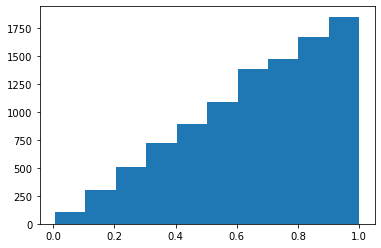

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

# check distibution is correct
_hist, _ = np.histogram(triangle)
_test.similar(_hist, [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], rtol=0.1, atol=100)

# Additional Resources

- Textbook section 10.1 and 10.2